<a href="https://colab.research.google.com/github/xslittlemaggie/ML-DL-Algorithm-Notes/blob/master/PCA%20from%20scratch%20%26%20sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Principal Component Analysis (PCA)</center></h1>

# **Step 0**: Import libraries

In [0]:
import numpy as np
import operator
from collections import Counter
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


# **Step 1**: Load sklearn built-in datasets: iris

In [0]:
iris = datasets.load_iris()
#iris.data
X = iris.data
Y = iris.target
data = pd.DataFrame(X)

In [0]:
species = np.chararray(Y.shape, itemsize=150)
for i in range(len(X)):
  if Y[i] == 0:
    species[i] = 'setosa'
  elif Y[i] == 1:
    species[i] = 'veriscolor'
  elif Y[i] == 2: 
    species[i] = 'virginica'

In [173]:
data.columns = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]
data["species"] = species
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,b'setosa'
1,4.9,3.0,1.4,0.2,b'setosa'
2,4.7,3.2,1.3,0.2,b'setosa'
3,4.6,3.1,1.5,0.2,b'setosa'
4,5.0,3.6,1.4,0.2,b'setosa'


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


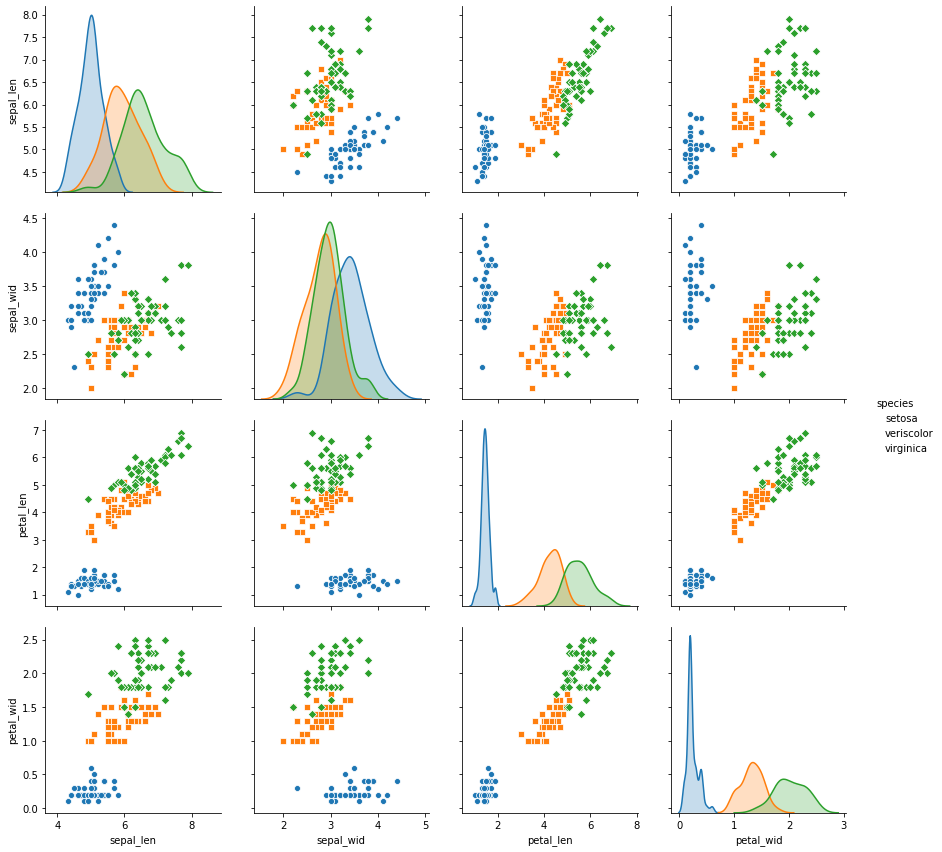

In [174]:
#sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(data, vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"], 
             hue = "species", 
             markers=["o", "s", "D"], size = 3)
#plt.legend()
plt.show()

From the scatter plot above, the different species overlap, so it is difficult to disginguish the points from different species.

Next, the Principal Component Analysis will be implemented to transform the features to decorrelate the correlation of the highly correlated features.

# **Step 2:** PCA

## **Part 1**: PCA from scratch

### 1. Standardize features

In [175]:
X_std = StandardScaler().fit_transform(X)
print(X_std[:5, :])  # print the first 5 rows, all columns

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### 2. Calculate covariance matrix

#### 1). Calculate the covaraince matrix manually

In [176]:
mean_vec = np.mean(X_std, axis = 0)
#print(mean_vec)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)
print(cov_mat)  # print the covariance matrix, the diagonals present the variance

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


#### 2). The python numpy built-in method to calculate the covariance matrix

In [177]:
# the python numpy built-in method to calculate the covariance matrix
print("Numpy covariance matrix: \n")
print(np.cov(X_std.T))

Numpy covariance matrix: 

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [178]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigenvectors: \n", eig_vecs)
print()
print("Eigenvalue: \n", eig_vals)

Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalue: 
 [2.93808505 0.9201649  0.14774182 0.02085386]


### 3. Choose the first two components to explan the most variance

In [179]:
# make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
print(eig_pairs)
print()

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key = lambda x:x[0], reverse = True)
print("Eigenvalues in descending order:")
print(eig_pairs)
print()
for i in eig_pairs:
  print(i[0])

[(2.938085050199995, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624864, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449475, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462696, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Eigenvalues in descending order:
[(2.938085050199995, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624864, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449475, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462696, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [180]:
total = sum(eig_vals)
val_exp = [(i/total) * 100 for i in sorted(eig_vals, reverse = True)]
print(val_exp)
print()
cum_val_exp = np.cumsum(val_exp)
print(cum_val_exp)

[72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]

[ 72.96244541  95.8132072   99.48212909 100.        ]


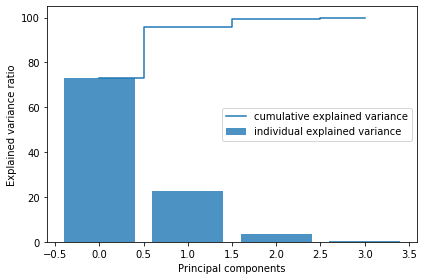

In [181]:
plt.figure(figsize = (6, 4))
plt.bar(range(4), val_exp, alpha = 0.8, align = 'center', label = "individual explained variance")
plt.step(range(4), cum_val_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### 5. Transform the 150 * 4 matrix into 150 * 2 matrix

In [182]:
# get the first two eigenvectors corresponding to the highest two eigenvalue 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1),
                     eig_pairs[1][1].reshape(4, 1)))
print(matrix_w)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [183]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [184]:
# transform the 4 dim into 2 dim
PCAs = X_std.dot(matrix_w)
print(PCAs[:5])

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


In [0]:
updated_data = {"PCA_1": PCAs[:, 0], "PCA_2": PCAs[:, 1], "species": species}
updated_data = pd.DataFrame(updated_data)

In [186]:
updated_data.head()

,PCA_1,PCA_2,species
0,-2.264703,-0.480027,b'setosa'
1,-2.080961,0.674134,b'setosa'
2,-2.364229,0.341908,b'setosa'
3,-2.299384,0.597395,b'setosa'
4,-2.389842,-0.646835,b'setosa'


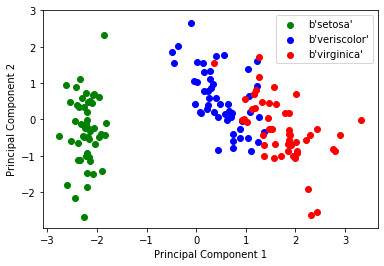

In [187]:
#plt.figure(figsize = (10, 6))
for lab, col in zip((b'setosa', b'veriscolor', b'virginica'), ("green", "blue", "red")): 
  
  plt.scatter(updated_data[updated_data["species"] == lab]["PCA_1"], 
              updated_data[updated_data["species"] == lab]["PCA_2"], 
              label = lab, c = col)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc = "best")
plt.show()

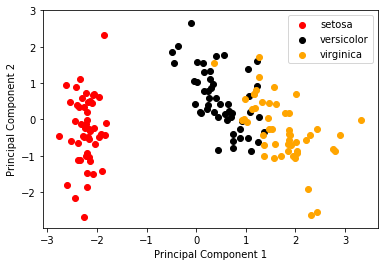

In [188]:
#plt.figure(figsize = (10, 6))
colors = ["red", "black", "orange"]

for i in [0, 1, 2]: 
  
  plt.scatter(PCAs[Y == i, 0], 
              PCAs[Y == i, 1], 
              label = iris.target_names[i], c = colors[i])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc = "best")
plt.show()

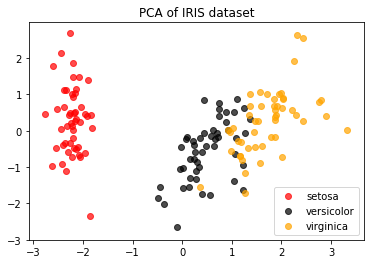

In [189]:
plt.figure()
colors = ["red", "black", "orange"]
for i in [0, 1, 2]:
  plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], alpha = 0.7, c = colors[i], label = iris.target_names[i])

plt.legend()
plt.title("PCA of IRIS dataset")
plt.show()

From the plot above, the points from three classes are less overlapped, and easier to be disginguished.

### **Part 2**: PCA from sklearn

In [0]:
from sklearn.decomposition import PCA

In [191]:
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,b'setosa'
1,4.9,3.0,1.4,0.2,b'setosa'
2,4.7,3.2,1.3,0.2,b'setosa'
3,4.6,3.1,1.5,0.2,b'setosa'
4,5.0,3.6,1.4,0.2,b'setosa'


In [0]:
X = StandardScaler().fit_transform(X)

In [193]:
pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

### 1. Get the components of the PCA

In [194]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### 2. Variance of the PCA (the eigen values)

- **explained_variance**: 

  - First component (2.93808505)
  
  - Second component (0.9201649)

- **explained_variance_ratio**: The percentage of variance of each component

  - First component (72.96%)
  
  - Second component (22.85%)


- **pca.explained_variance_ratio_.sum()**: The total variance is 97.768%



In [195]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [196]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [197]:
pca.explained_variance_ratio_.sum()

0.9581320720000165

### 2. Visualization

#### 1). Visualizatioin of each of the components

In [198]:
pca_all = PCA().fit(X)
pca_all.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

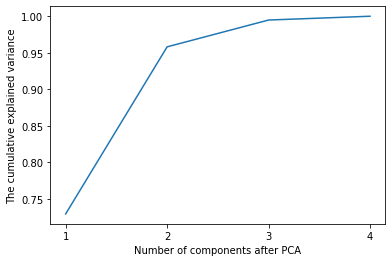

In [199]:
plt.plot([1, 2, 3, 4], np.cumsum(pca_all.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])
plt.xlabel("Number of components after PCA")
plt.ylabel("The cumulative explained variance")
plt.show()

#### 1). Visualizaiton of the data points after the PCA

In [200]:
X_pca[Y == 0, 0] # 取出所有 y = 0 的行，第0 列
X_pca[Y == 0, 1] # 取出所有 y = 0 的行，第1 列

array([ 0.4800266 , -0.67413356, -0.34190802, -0.59739451,  0.64683538,
        1.48917752,  0.0476442 ,  0.22314807, -1.11532768, -0.46901356,
        1.04369065,  0.13307834, -0.72867617, -0.96150673,  1.86005711,
        2.68628449,  1.48360936,  0.48883832,  1.40501879,  1.12784938,
        0.40885571,  0.92412143,  0.45834367,  0.08555853,  0.13725446,
       -0.62561859,  0.24216355,  0.52714953,  0.31321781, -0.3377319 ,
       -0.50454069,  0.42369507,  1.79357586,  2.15072788, -0.46020184,
       -0.2061074 ,  0.66155811,  0.59229277, -0.90418004,  0.26887896,
        0.44171539, -2.33741516, -0.47910069,  0.47232667,  1.14222926,
       -0.71105273,  1.1204297 , -0.38624687,  0.99795976,  0.00921636])

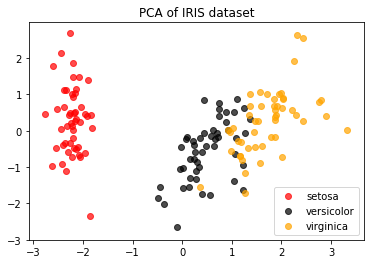

In [201]:
plt.figure()
colors = ["red", "black", "orange"]
for i in [0, 1, 2]:
  plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], alpha = 0.7, c = colors[i], label = iris.target_names[i])

plt.legend()
plt.title("PCA of IRIS dataset")
plt.show()

#### 2). Visualization of the first 2 features (without PCA)

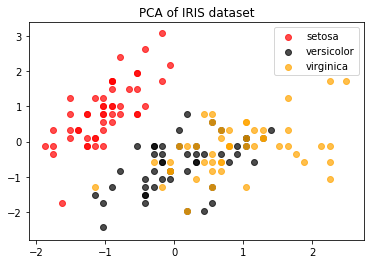

In [202]:
plt.figure()
colors = ["red", "black", "orange"]
for i in [0, 1, 2]:
  plt.scatter(X[Y == i, 0],X[Y == i, 1], alpha = 0.7, c = colors[i], label = iris.target_names[i])

plt.legend()
plt.title("PCA of IRIS dataset")
plt.show()